In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Partie 1: Exploration des données

In [2]:
data = pd.read_csv('./datasetCovid.csv', encoding="'ISO-8859-1")
data

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.022340,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,ae66feb9e4dc3a0,3,positive,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5640,517c2834024f3ea,17,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5641,5c57d6037fe266d,4,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5642,c20c44766f28291,10,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Analyser la variable cible

In [3]:
columns = data.columns
columns

Index(['Patient ID', 'Patient age quantile', 'SARS-Cov-2 exam result',
       'Patient addmited to regular ward (1=yes, 0=no)',
       'Patient addmited to semi-intensive unit (1=yes, 0=no)',
       'Patient addmited to intensive care unit (1=yes, 0=no)', 'Hematocrit',
       'Hemoglobin', 'Platelets', 'Mean platelet volume ',
       ...
       'Hb saturation (arterial blood gases)',
       'pCO2 (arterial blood gas analysis)',
       'Base excess (arterial blood gas analysis)',
       'pH (arterial blood gas analysis)',
       'Total CO2 (arterial blood gas analysis)',
       'HCO3 (arterial blood gas analysis)',
       'pO2 (arterial blood gas analysis)', 'Arteiral Fio2', 'Phosphor',
       'ctO2 (arterial blood gas analysis)'],
      dtype='object', length=111)

In [4]:
target_var = data['SARS-Cov-2 exam result']
print(target_var)
target_var.describe()
# target variable is a categorical variable that represents the exam results
# can be either negative or positive but it is not boolean yet

0       negative
1       negative
2       negative
3       negative
4       negative
          ...   
5639    positive
5640    negative
5641    negative
5642    negative
5643    positive
Name: SARS-Cov-2 exam result, Length: 5644, dtype: object


count         5644
unique           2
top       negative
freq          5086
Name: SARS-Cov-2 exam result, dtype: object

#### Identifier les lignes et les colonnes

In [5]:
# every row represents a patient every column represents a feature
print(data.shape)

(5644, 111)


In [6]:
# features
for column in columns :
    print(column)


Patient ID
Patient age quantile
SARS-Cov-2 exam result
Patient addmited to regular ward (1=yes, 0=no)
Patient addmited to semi-intensive unit (1=yes, 0=no)
Patient addmited to intensive care unit (1=yes, 0=no)
Hematocrit
Hemoglobin
Platelets
Mean platelet volume 
Red blood Cells
Lymphocytes
Mean corpuscular hemoglobin concentration (MCHC)
Leukocytes
Basophils
Mean corpuscular hemoglobin (MCH)
Eosinophils
Mean corpuscular volume (MCV)
Monocytes
Red blood cell distribution width (RDW)
Serum Glucose
Respiratory Syncytial Virus
Influenza A
Influenza B
Parainfluenza 1
CoronavirusNL63
Rhinovirus/Enterovirus
Mycoplasma pneumoniae
Coronavirus HKU1
Parainfluenza 3
Chlamydophila pneumoniae
Adenovirus
Parainfluenza 4
Coronavirus229E
CoronavirusOC43
Inf A H1N1 2009
Bordetella pertussis
Metapneumovirus
Parainfluenza 2
Neutrophils
Urea
Proteina C reativa mg/dL
Creatinine
Potassium
Sodium
Influenza B, rapid test
Influenza A, rapid test
Alanine transaminase
Aspartate transaminase
Gamma-glutamyltransfe

#### Identifying variable types

In [7]:
for dtype in data.dtypes.iteritems() : 
    print(f'variable : {dtype[0]} | dtype: {dtype[1]}') 
# data.dtype 

variable : Patient ID | dtype: object
variable : Patient age quantile | dtype: int64
variable : SARS-Cov-2 exam result | dtype: object
variable : Patient addmited to regular ward (1=yes, 0=no) | dtype: int64
variable : Patient addmited to semi-intensive unit (1=yes, 0=no) | dtype: int64
variable : Patient addmited to intensive care unit (1=yes, 0=no) | dtype: int64
variable : Hematocrit | dtype: float64
variable : Hemoglobin | dtype: float64
variable : Platelets | dtype: float64
variable : Mean platelet volume  | dtype: float64
variable : Red blood Cells | dtype: float64
variable : Lymphocytes | dtype: float64
variable : Mean corpuscular hemoglobin concentration (MCHC) | dtype: float64
variable : Leukocytes | dtype: float64
variable : Basophils | dtype: float64
variable : Mean corpuscular hemoglobin (MCH) | dtype: float64
variable : Eosinophils | dtype: float64
variable : Mean corpuscular volume (MCV) | dtype: float64
variable : Monocytes | dtype: float64
variable : Red blood cell dist

### analysing missing values

In [8]:
number_of_missing_values = data.isna().sum().sort_values(ascending=False)[:100]
print(f"pourcentage % of missing values per columns\n{number_of_missing_values/data.shape[0] * 100}")

pourcentage % of missing values per columns
Urine - Sugar                         100.000000
Mycoplasma pneumoniae                 100.000000
Partial thromboplastin time (PTT)     100.000000
Prothrombin time (PT), Activity       100.000000
D-Dimer                               100.000000
                                         ...    
Coronavirus HKU1                       76.045358
Parainfluenza 3                        76.045358
Chlamydophila pneumoniae               76.045358
Bordetella pertussis                   76.045358
Parainfluenza 4                        76.045358
Length: 100, dtype: float64


In [9]:
miss_values_per_row=data.isnull().any(axis=1).sort_values(ascending=False)
print(f"pourcentage % of missing values per row\n{miss_values_per_row/data.shape[1] * 100} %")

pourcentage % of missing values per row
0       0.900901
3880    0.900901
3768    0.900901
3767    0.900901
3766    0.900901
          ...   
1879    0.900901
1878    0.900901
1877    0.900901
1876    0.900901
5643    0.900901
Length: 5644, dtype: float64 %


### Analyse de fond :


Visualisation de la Target

In [10]:
# converting target type
target_var.nunique()
# confirming that we have only two categories

2

In [11]:
# mapping
bool_mapper = {'negative':0,'positive':1}
target_var_bool=target_var.map(bool_mapper,)
target_var_bool

0       0
1       0
2       0
3       0
4       0
       ..
5639    1
5640    0
5641    0
5642    0
5643    1
Name: SARS-Cov-2 exam result, Length: 5644, dtype: int64

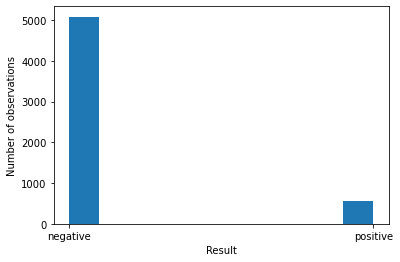

In [17]:
fix , ax = plt.subplots()
ax.hist(target_var)
ax.set_xlabel("Result")
ax.set_ylabel("Number of observations")
plt.show()

Signification des variables : 

la variable detirmine le resultat du test donc si la variable est positive donc
l'observation a le covide est vice versa

## Partie 2 : Pretretement des données

### Créer un premier modèle et évaluer les résultats obtenus

le modele:

f(x) = ax + b


cost function:

1/2m * (XH-Y)'(XH-Y)


grad :

grad = 1/m * X'(X.H - y )


learning :

H = H - alpha * grad

In [18]:
def model(X:pd.DataFrame,H:pd.Series):
    return X.dot(H)

In [22]:
def cost(X:pd.DataFrame,H:pd.Series,Y:pd.Series):
    m = len(Y)
    return (1/(2*m))*(X.dot(H)-Y).T.dot(X.dot(H)-Y)

In [20]:
def gradient(X:pd.DataFrame,H:pd.Series,Y:pd.Series):
    m = len(Y)
    return (1/m)*X.T.dot(X.dot(H)-Y)

In [26]:
def gradient_decent(X:pd.DataFrame,H:pd.Series,Y:pd.Series,alpha,nb_iter:int):
    for i in range(nb_iter):
        H = H - alpha * gradient(X=X , H= H , Y=Y) 
        
    

0
1
2
3
4
